# Back of the Envelope Sprite Orbital Control

Some back-of-the-envelope calculations to see if formation flight is feasible.

In [1]:
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import numpy.linalg
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import random
from numpy.linalg import pinv
from scipy import interpolate

## System Under Consideration

The system is two Sprites drifting apart at $\sim$2 m/s. The question to answer is whether these chips could even effect their orbits enough to prevent themselves from drifting out of communication range. If they can't do that, then maintaining formation is not feasible.

#### How much force is required?

Each chip has a mass of approximately 6 g, or $6\times 10^{-3}$ kg. We'll assume that they are moving with constant velocity. In chip A's frame of reference, chip B is moving away at 4m/s. The momentum of chip B is then given by:

\begin{align}
\rho &= m\underline{v}\\
&= \left(6\times 10^{-3}\right)4\\
&= 2.4 \times 10^{-2}\frac{\text{kg}\cdot\text{m}}{\text{sec}}
\end{align}

In order to prevent chip B from moving any farther away, chip A must change its momentum by this amount. That is to say:

\begin{align}
\Delta \rho &= 2.4 \times 10^{-2}
\end{align}

Since force is defined by the time derivative of momentum, this change in momentum can be used to determine the amount of force required to prevent further separation of the chips. Let's say we want to stop the chips from separating in $\sim$10 seconds. In that case, the necessary force is:

\begin{align}
F &= \frac{\Delta p}{\Delta t}\\
&= \frac{2.4 \times 10^{-2}}{10}\\
&= 2.4 \times 10^{-3} N
\end{align}

#### Applying the force

This external force on chip A comes from atmospheric drag, given by the equation below:

\begin{align}
\underline{F}_d = \frac{1}{2}C_dA \rho \underline{V}_s^T\underline{V}_s
\end{align}

The parameters of the above drag equation are notoriously difficult to get right. $A$ is the effective surface area (which depends on the spacecraft's attitude), $\rho$ is the atmospheric density (which depends on position), $\underline{V}_s$ is the spacecraft velocity relative to the atmosphere (which depends on velocity), and $C_d$ is the drag coefficient - a parameter that is often estimated on-orbit and is related to the properties of the surface material. Typically, $C_d$ ranges from 1.5-3. The direction of the drag force is typically approximately antiparallel to the relative velocity between the spacecraft and the atmosphere, though the large surface area and small mass of the Sprite may enable a more elastic collision assumption.

#### Making Estimates

To avoid getting buried in details, I'm going to make some order-of-magnitude assumptions and move on.

\begin{align}
C_d &= 2.2\text{ unitless}\\
m &= 6\times 10^{-3}\text{ kg}\\
A &= 1.225 \times 10^{-3}\text{ m}\\
V_s &= 7670\text{ m/s}
\end{align}

In [32]:
Cd = 2.2
m = .006
w = 3.5e-2
A = w*w
Vs = 7670.

$C_d$ is probably close to right. The mass is close to right. For the area, I'm just assuming that the entire surface area of the chip is getting exposed to atmosphere. The relative velocity assumes that the chip is moving about as quickly as the International Space Station. The atmospheric density will vary according to the data below, which I found on the Internet.

In [33]:
densities = numpy.array([1.17, 9.49e-2, 4.07e-3, 3.31e-4, 1.68e-5, 5.08e-7,
                         1.80e-8, 3.26e-9, 1.18e-9, 5.51e-10, 2.91e-10, 1.66e-10,
                         9.91e-11, 6.16e-11, 3.94e-11, 2.58e-11, 1.72e-11, 1.16e-11,
                         7.99e-12, 5.55e-12, 3.89e-12, 2.75e-12, 1.96e-12, 1.4e-12,
                         1.01e-12, 7.3e-13])
altitudes = numpy.arange(0, 520000, 20000)/1000.
density = interpolate.interp1d(altitudes, densities, 'linear')

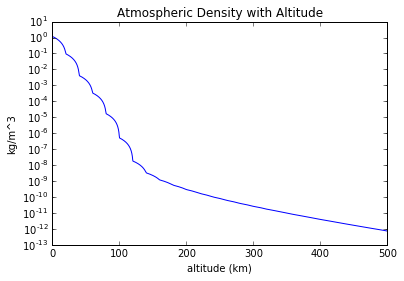

In [34]:
def visualizeDensity():
    xnew = numpy.arange(0, 500000, .1)/1000.
    ynew = density(xnew)
    plt.plot(xnew, ynew)
    plt.xlabel('altitude (km)');plt.ylabel('kg/m^3')
    plt.title('Atmospheric Density with Altitude')
    plt.yscale('log');plt.show()
visualizeDensity()

It's a bad interpolation, good enough for this though.

#### Force with Altitude

This is sufficient to get a sense for the maximum drag force that can be expected with altitude. Note that not all of this force will be directed in the desired direction (some of it will just slow the chip down, but some fraction will move it laterally). The function below returns the magnitude of the force.

In [35]:
def getDrag(altitude):
    return .5*Cd*A*Vs*Vs*density(altitude)

Find the magnitude of the drag force with altitude, assuming that the chip is moving at ISS velocity at all of these altitudes, and that its entire surface area is exposed to the incident atmosphere.

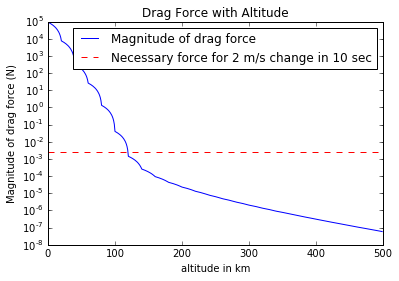

In [38]:
tudes = numpy.arange(0, 500, 1)
plt.plot(tudes, getDrag(tudes), label='Magnitude of drag force')
plt.plot(tudes, numpy.ones(len(tudes))*2.4e-3, 'r--', label='Necessary force for 2 m/s change in 10 sec')
plt.xlabel('altitude in km')
plt.ylabel('Magnitude of drag force (N)')
plt.title('Drag Force with Altitude')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

## Delta V Availability

## Conclusion

The current chips cannot maintain formation on orbit by using drag. The magnitude of the drag force in the above plot is an overestimate in multiple ways. It assumes that the entire surface area of the chip is effective for drag, and it assumes a constant velocity at all altitudes. In reality, the velocity will be slower at lower altitudes and the attitude will lead to a reduced effective surface area.